<a href="https://colab.research.google.com/github/Satyaram-k/satyaram_INFO5731_Spring2020/blob/main/In_class_exercise/In_class_exercise_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 04/12/2022)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731-spring2022/blob/main/assignments/exercise05_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [12]:
# Write your code here


# imports
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
import pandas as pd
import nltk
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, KFold, cross_val_score
from xgboost import XGBClassifier

In [13]:
# loading the dataset

train_df = pd.read_csv(r'/content/stsa-train.txt',sep = 'delimiter=',header= None,names=['Text'])
train_df[['Sentiment','Text']] = train_df["Text"].str.split(" ", 1, expand=True)
test_df = pd.read_csv(r'/content/stsa-test.txt',sep = 'delimiter=',header= None,names=['Text'])
test_df[['Sentiment','Text']] = test_df["Text"].str.split(" ", 1, expand=True)


In [14]:
# training dataset
train_df.head()

,Text,Sentiment
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting-room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1


In [15]:
# test dataset
test_df.head()

,Text,Sentiment
0,"no movement , no yuks , not much of anything .",0
1,"a gob of drivel so sickly sweet , even the eag...",0
2,"gangs of new york is an unapologetic mess , wh...",0
3,"we never really feel involved with the story ,...",0
4,this is one of polanski 's best films .,1


In [16]:
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wl= WordNetLemmatizer()
# data cleaning
def clean_text(data):
  data="".join([word.lower() for word in data if word not in string.punctuation])
  data = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", data)
  tokens = re.split('\W+',data)
  data = [wl.lemmatize(word) for word in tokens if word not in stopword]
  return data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
# Convert text and train data into numerical
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(train_df['Text'])
print(X_tfidf.shape)
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()
X_test_tfidf = tfidf_vect.transform(test_df['Text'])
print(X_test_tfidf.shape)

(6920, 13343)
(1821, 13343)


In [18]:
# Algorithms
mnb = MultinomialNB()
svm = LinearSVC()
knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()

# spliting the train data
x_train, x_test, y_train, y_test = train_test_split(X_tfidf_df, train_df['Sentiment'].values,
                                                test_size=0.2, random_state=42)
model_mnb = mnb.fit(x_train,y_train)

In [19]:
# Defining method for cross validation score for all models
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
def cross_validation_score(modelName, x, y):
  scoring = 'accuracy'
  kfold = KFold(10, random_state = 7,shuffle=True)
  cross_val = cross_val_score(modelName, x, y, cv=kfold).mean()
  return cross_val

In [23]:
# (1) MultinominalNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
mnb_test = mnb.fit(x_train,y_train)
y_mnb = mnb_test.predict(x_test)
print('Accuracy Score: %s' % accuracy_score(y_mnb,y_test))
print(classification_report(y_test,y_mnb))
from sklearn.model_selection import cross_val_score
scores_MNB = cross_val_score(mnb, x_test, y_test, cv=10)
kfold = KFold(10, random_state = 7, shuffle=True)
print("Accuracy with MultinominalNB:",scores_MNB.mean())
mnb_scores_mean = cross_validation_score(mnb,x_test,y_test)
print('MNB Cross Validation Score: {0}'.format(mnb_scores_mean))
test_predicted_mnb = mnb.predict(x_test)
test_accuracy_mnb = round(accuracy_score(test_predicted_mnb, y_test),4)*100
print("\nTesting Data")
print("Accuracy: ", test_accuracy_mnb)
print(classification_report(y_test, test_predicted_mnb))

Accuracy Score: 0.7955202312138728
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       671
           1       0.76      0.88      0.82       713

    accuracy                           0.80      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.80      0.80      0.79      1384

Accuracy with MultinominalNB: 0.7247054530288813
MNB Cross Validation Score: 0.7138828067980398

Testing Data
Accuracy:  79.55
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       671
           1       0.76      0.88      0.82       713

    accuracy                           0.80      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.80      0.80      0.79      1384



In [24]:
# (2) SVM

svm_test = svm.fit(x_train,y_train)
y_svm = svm_test.predict(x_test)
print('Accuracy Score: %s' % accuracy_score(y_svm,y_test))
print(classification_report(y_test,y_svm))
from sklearn.model_selection import cross_val_score
scores_SVM = cross_val_score(svm, x_test, y_test, cv=10)
print("Accuracy with SVM:",scores_SVM.mean())
svm_scores_mean = cross_validation_score(svm, x_test,y_test)
print('SVM Cross Validation Score: {0}'.format(svm_scores_mean))
test_predicted_svm = svm.predict(x_test)
test_accuracy_svm = round(accuracy_score(test_predicted_svm, y_test),4)*100
print("\nTesting Data")
print("Accuracy: ", test_accuracy_svm)
print(classification_report(y_test, test_predicted_svm))

Accuracy Score: 0.791907514450867
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       671
           1       0.78      0.83      0.80       713

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384

Accuracy with SVM: 0.7348034615785632
SVM Cross Validation Score: 0.7348451673443853

Testing Data
Accuracy:  79.19
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       671
           1       0.78      0.83      0.80       713

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384



In [25]:
# (3) KNN Model
knn_test = knn.fit(x_train,y_train)
y_knn = knn_test.predict(x_test)
print('Accuracy Score: %s' % accuracy_score(y_knn,y_test))
print(classification_report(y_test,y_knn))
from sklearn.model_selection import cross_val_score
scores_KNN = cross_val_score(knn, x_test, y_test, cv=10)
print("Accuracy with KNN Model:",scores_KNN.mean())
knn_scores_mean = cross_validation_score(knn, x_test,y_test)
print('KNN Cross Validation Score: {0}'.format(knn_scores_mean))
test_predicted_knn = knn.predict(x_test)
test_accuracy_knn = round(accuracy_score(test_predicted_knn, y_test),4)*100
print("\nTesting Data")
print("Accuracy: ", test_accuracy_knn)
print(classification_report(y_test, test_predicted_knn))

Accuracy Score: 0.740606936416185
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       671
           1       0.74      0.77      0.75       713

    accuracy                           0.74      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.74      0.74      0.74      1384

Accuracy with KNN Model: 0.6675737670732979
KNN Cross Validation Score: 0.6669325409237826

Testing Data
Accuracy:  74.06
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       671
           1       0.74      0.77      0.75       713

    accuracy                           0.74      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.74      0.74      0.74      1384



In [26]:
# (4) Decision tree
des_tree_test = dt.fit(x_train,y_train)
y_des_tree = des_tree_test.predict(x_test)
print('Accuracy Score: %s' % accuracy_score(y_des_tree,y_test))
print(classification_report(y_test,y_des_tree))
scores_DT = cross_val_score(dt, x_test, y_test, cv=10)
print("Accuracy with Decision tree:",scores_DT.mean())
dt_scores_mean = cross_validation_score(dt, x_test,y_test)
print('Decision Tree Cross Validation Score: {0}'.format(dt_scores_mean))
test_predicted_dt = dt.predict(x_test)
test_accuracy_dt = round(accuracy_score(test_predicted_dt, y_test),4)*100
print("\nTesting Data")
print("Accuracy: ", test_accuracy_dt)
print(classification_report(y_test, test_predicted_dt))

Accuracy Score: 0.6582369942196532
              precision    recall  f1-score   support

           0       0.66      0.61      0.64       671
           1       0.66      0.70      0.68       713

    accuracy                           0.66      1384
   macro avg       0.66      0.66      0.66      1384
weighted avg       0.66      0.66      0.66      1384

Accuracy with Decision tree: 0.6112397038890627
Decision Tree Cross Validation Score: 0.6097956417474715

Testing Data
Accuracy:  65.82000000000001
              precision    recall  f1-score   support

           0       0.66      0.61      0.64       671
           1       0.66      0.70      0.68       713

    accuracy                           0.66      1384
   macro avg       0.66      0.66      0.66      1384
weighted avg       0.66      0.66      0.66      1384



In [27]:
# (5) Random Forest
rf_test = rf.fit(x_train,y_train)
y_rf = rf_test.predict(x_test)
print('Accuracy Score: %s' % accuracy_score(y_rf,y_test))
print(classification_report(y_test,y_rf))
scores_RF = cross_val_score(rf, x_test, y_test, cv=10)
print("Accuracy with Random Forest:",scores_RF.mean())
rf_scores_mean = cross_validation_score(rf, x_test,y_test)
print('Random Forest Cross Validation Score: {0}'.format(rf_scores_mean))
test_predicted_rf = rf.predict(x_test)
test_accuracy_rf = round(accuracy_score(test_predicted_rf, y_test),4)*100
print("\nTesting Data")
print("Accuracy: ", test_accuracy_rf)
print(classification_report(y_test, test_predicted_rf))

Accuracy Score: 0.7413294797687862
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       671
           1       0.72      0.82      0.77       713

    accuracy                           0.74      1384
   macro avg       0.75      0.74      0.74      1384
weighted avg       0.75      0.74      0.74      1384

Accuracy with Random Forest: 0.6791783964133041
Random Forest Cross Validation Score: 0.6798978208737358

Testing Data
Accuracy:  74.13
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       671
           1       0.72      0.82      0.77       713

    accuracy                           0.74      1384
   macro avg       0.75      0.74      0.74      1384
weighted avg       0.75      0.74      0.74      1384



In [28]:
#(6) XGBoost
xgb_test = xgb.fit(x_train,y_train)
y_xgb = xgb_test.predict(x_test)
print('Accuracy Score: %s' % accuracy_score(y_xgb,y_test))
print(classification_report(y_test,y_xgb))
scores_XGB = cross_val_score(xgb, x_test, y_test, cv=10)
print("Accuracy with XGBoost:",scores_XGB.mean())
xgb_scores_mean = cross_validation_score(xgb, x_test,y_test)
print('XGBoost Cross Validation Score: {0}'.format(xgb_scores_mean))
test_predicted_xgb = xgb.predict(x_test)
test_accuracy_xgb = round(accuracy_score(test_predicted_xgb, y_test),4)*100
print("\nTesting Data")
print("Accuracy: ", test_accuracy_xgb)
print(classification_report(y_test, test_predicted_xgb))

Accuracy Score: 0.6445086705202312
              precision    recall  f1-score   support

           0       0.75      0.40      0.52       671
           1       0.61      0.88      0.72       713

    accuracy                           0.64      1384
   macro avg       0.68      0.64      0.62      1384
weighted avg       0.68      0.64      0.62      1384

Accuracy with XGBoost: 0.6184704410384736
XGBoost Cross Validation Score: 0.614211239703889

Testing Data
Accuracy:  64.45
              precision    recall  f1-score   support

           0       0.75      0.40      0.52       671
           1       0.61      0.88      0.72       713

    accuracy                           0.64      1384
   macro avg       0.68      0.64      0.62      1384
weighted avg       0.68      0.64      0.62      1384



In [29]:
print("Accuracy with MultinominalNB: ",scores_MNB.mean())
print("Accuracy with SVM: ",scores_SVM.mean())
print("Accuracy with KNN: ",scores_KNN.mean())
print("Accuracy with Decision tree: ",scores_DT.mean())
print("Accuracy with Random Forest: ",scores_RF.mean())
print("Accuracy with XGBoost: ",scores_XGB.mean())

Accuracy with MultinominalNB:  0.7247054530288813
Accuracy with SVM:  0.7348034615785632
Accuracy with KNN:  0.6675737670732979
Accuracy with Decision tree:  0.6112397038890627
Accuracy with Random Forest:  0.6791783964133041
Accuracy with XGBoost:  0.6184704410384736


In [30]:
predict_svm = svm_test.predict(X_test_tfidf)
print('Final trained model(SVM) with high accuracy evaluated on the test data: %s' % accuracy_score(predict_svm,test_df['Sentiment']))

Final trained model(SVM) with high accuracy evaluated on the test data: 0.7891268533772653


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [31]:
#Write your code here.
### Using the dataset I have generated from Assignment 2. As it is mentioned we can also use different text data as wanted.

import pandas as pd
df = pd.read_csv('review_text.csv')
df.head()


,Unnamed: 0,Review
0,0,Purchased this product advertised as fully unl...
1,1,I was feeling a bit skeptical after I placed m...
2,2,Phone was not unlocked could it use it
3,3,The screen came cracked and popped out of the ...
4,4,This is the best experience I have ever had wi...


In [32]:
# Text Preprocessing
df['Text'] = df['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
df['Text'] = df['Text'].str.replace('[^\w\s]','')
from textblob import Word
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
df['Text'].head()

0    purchased product advertised fully unlocked in...
1    feeling bit skeptical placed order proven wron...
2                             phone unlocked could use
3    screen came cracked popped frame hopefully ret...
4    best experience ever buying renewed phone phon...
Name: Text, dtype: object

In [34]:
# TF-IDF 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf_vects = tfidf_vect.fit_transform(df['Text'].values.astype('U'))
names= tfidf_vect.get_feature_names()

In [37]:
# K Means
k=9
from sklearn.cluster import KMeans
model = KMeans(n_clusters = k,init='k-means++', max_iter=10000, random_state=50)
model.fit(tfidf_vects)
from collections import Counter
Counter(model.labels_)

Counter({0: 78, 1: 147, 2: 192, 3: 497, 4: 908, 5: 74, 6: 352, 7: 713, 8: 110})

In [38]:
top_n_features = 10
centroids = model.cluster_centers_.argsort()[:, ::-1]
for cluster_num in range(k):
    key_features = [names[i] for i in centroids[cluster_num, :top_n_features]]
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('-'*100)

CLUSTER #1
Key Features: ['good', 'phone', 'quality', 'condition', 'money', 'product', 'work', 'price', 'worth', 'far']
----------------------------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['great', 'work', 'phone', 'condition', 'price', 'everything', 'issue', 'purchase', 'product', 'life']
----------------------------------------------------------------------------------------------------
CLUSTER #3
Key Features: ['like', 'new', 'brand', 'phone', 'look', 'work', 'great', 'love', 'condition', 'came']
----------------------------------------------------------------------------------------------------
CLUSTER #4
Key Features: ['la', 'el', 'de', 'en', 'que', 'con', 'muy', 'batería', 'un', 'lo']
----------------------------------------------------------------------------------------------------
CLUSTER #5
Key Features: ['perfect', 'work', 'iphone', 'product', 'battery', 'everything', 'excellent', 'buy', 'happy', 'phone']
------------

In [39]:
cluster_center=model.cluster_centers_
cluster_center

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00178507, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.00047864, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00219465, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00522881, ..., 0.        , 0.        ,
        0.        ]])

In [40]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(tfidf_vects, model.labels_, metric='euclidean')
silhouette_score

0.022053188737393866

In [42]:
# DBSCAN
Text_reviews=[]
for i in df['Text']:
    Text_reviews.append(str(i).split())
import gensim
w2v_model=gensim.models.Word2Vec(Text_reviews, size=100, workers=4)

In [43]:
import numpy as np
vectors = []
for i in Text_reviews:
    vector = np.zeros(100)
    count = 0
    for word in i:
        try:
            vec = w2v_model.wv[word]
            vector += vec
            count += 1
        except:
            pass
    vector /= count
    vectors.append(vector)  
vectors = np.array(vectors)
vectors = np.nan_to_num(vectors)

In [44]:
from sklearn.cluster import DBSCAN
minPts = 2*100

def lower_bound(nums, target): 
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data): 
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) 
        if(len(dists) == 200 and dists[199] > dist): 
            l = int(lower_bound(dists, dist)) 
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
# Dist 199 contains the distance of 200th nearest neighbour.    
    return dists[199]

vectors.shape

(3071, 100)

In [45]:
neighbor = []
for val in vectors[:300]:
    neighbor.append(compute200thnearestneighbour(val, vectors[:300]))
neighbor.sort()

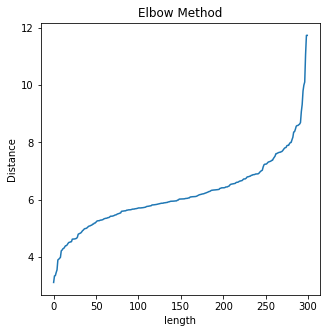

In [46]:
%matplotlib inline
from matplotlib import pyplot as plt
# Plotting for the Elbow Method :
plt.figure(figsize=(5,5))
plt.title("Elbow Method")
plt.plot([x for x in range(len(neighbor))], neighbor)
plt.xlabel("length")
plt.ylabel("Distance")
plt.show()

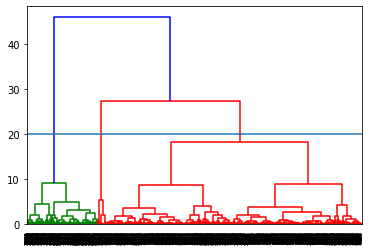

In [47]:
# Hierarchical Clustering
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(vectors,method='ward'))
plt.axhline(y=20)

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

Every point in the dataset is considered by K-means, which then utilizes that information to develop the grouping over a series of iterations. DBSCAN is built on density. Unknown clusters with the same density will be discovered using this method. Lastly, Hierarchical clustering is employed when we wish to locate the clusters inside the clusters. It's the ideal method to use when trying to uncover the data's hidden structures. In general, K-means is more efficient than DBSCAN and Hierarchical clustering, when dealing with large datasets.